# **Libraries Importation**

In [3]:
import pandas as pd 
import tweepy as tw
import json
import numpy as np

In [2]:
#Twitter Credentials
credentials={}
credentials["CONSUMER_KEY"] = "OAW2U8TGWvy9gYalD69gKhjxz"
credentials["CONSUMER_SECRET"] = "ZLcNymL9itzN0T4mogaDVwoC7A9YqVRvZwyrbcZh77j1HX8cLX"
credentials["ACESS_TOKEN"] = "1367826435478597632-CQoCv5IGmb4lY8EAOT9S9YPF5wr18W"
credentials["ACESS_SECRET"] = "hhtrTQo84P3psSUeO7Tim4Rcn6pyjC5GIZ80oZUHCilCR"

In [3]:
#save the credentials into filename twitter key in json format
with open ('twitter_keys', 'w') as file:
    json.dump(credentials,file)

In [4]:
#load the keys for authentication purpose 
with open ('twitter_keys', 'r') as file:
    twt_keys = json.load(file)

# **Authentication of the API**

In [5]:
auth = tw.OAuthHandler(twt_keys['CONSUMER_KEY'],twt_keys['CONSUMER_SECRET'])
auth.set_access_token(twt_keys['ACESS_TOKEN'],twt_keys['ACESS_SECRET'])
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
#Query of the tweet
search_words = "BorisJohnsonOut"
date_since = "2021-10-10"
# Collect tweets
endsars_twt = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(10000)

In [7]:
from tqdm import tqdm
tweet_copy = []
for tweet in tqdm(endsars_twt):
    tweet_copy.append(tweet)

8873it [45:45,  3.23it/s]


In [9]:
len(tweet_copy)

10000


# Passing the Data In Frame Using Pandas

In [53]:
#create a dictionary 
bj_dict = {'user_name': [], 'date':[],'tweet':[],'user_date':[],'favorite_count':[], 'user_locatn': [], 
           'sources': [],'followers':[], 'ver_acct': [],'retwt_count':[],'retwt_status':[],'user_fav':[]}
#pandas frame set up
for tweet in tqdm(tweet_copy):
    bj_dict['user_name'].append(tweet.user.name)
    bj_dict['user_date'].append(tweet.user.created_at)
    bj_dict['date'].append(tweet.created_at)
    bj_dict['tweet'].append(tweet.text)
    bj_dict['favorite_count'].append(tweet.favorite_count)
    bj_dict['user_locatn'].append(tweet.user.location)
    bj_dict['sources'].append(tweet.source)
    bj_dict['followers'].append(tweet.user.followers_count)
    bj_dict['ver_acct'].append(tweet.user.verified)
    bj_dict['retwt_count'].append(tweet.retweet_count)
    bj_dict['retwt_status'].append(tweet.retweeted)
    bj_dict['user_fav'].append(tweet.user.favourites_count)

100%|██████████| 8873/8873 [00:00<00:00, 177823.08it/s]


In [62]:
bj = pd.DataFrame(bj_dict)

In [63]:
bj.head(100)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav
0,Lorn,2021-12-17 09:17:18,RT @daviesaplegend: Well done North Shropshire...,2021-09-28 06:40:08,0,Plague Island,Twitter Web App,276,False,10,False,4962
1,Peter Kemp 🔶️,2021-12-17 09:17:10,"RT @MartynCooper: Well, The @LibDems have done...",2019-02-20 11:18:09,0,,Twitter Web App,1576,False,3,False,33941
2,SasasaG 🐝😷💙 3.5%,2021-12-17 09:17:06,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-02-06 11:35:17,0,"London, England",Twitter for iPhone,1501,False,0,False,42933
3,Rainbow Warrior 💙#JOHNSONOUT #GTTO #FBPE 🇪🇺💻,2021-12-17 09:16:46,RT @hewitson10: It wasn’t a Downing Street loc...,2015-11-24 11:47:35,0,Alcatraz,Twitter for Android,20874,False,2,False,169317
4,Andy Sadler,2021-12-17 09:16:40,Today is a great #FollowBackFriday #NorthShrop...,2015-05-04 06:23:11,0,,Twitter for iPhone,79,False,0,False,3751
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Rose Y 🌹❤🌹,2021-12-17 08:42:23,Overwhelmed is an understatement. Thank you to...,2014-08-01 12:44:57,4,,Twitter for Android,3698,False,1,False,22182
96,alixia,2021-12-17 08:42:02,@LBC @NickFerrariLBC @BorisJohnson is scared o...,2021-02-07 17:13:14,0,,Twitter for iPhone,5,False,0,False,1898
97,Fly Boy 💙Proud to be a European!#FBPE,2021-12-17 08:41:36,RT @daviesaplegend: Well done North Shropshire...,2010-12-25 23:04:46,0,Europe,Twitter for iPhone,716,False,10,False,59814
98,Curly Bex,2021-12-17 08:41:36,Imagine if Boris Johnson's after dinner speake...,2009-01-26 13:49:41,0,London,Twitter for Android,250,False,0,False,1848


In [140]:
#save the data set too csv
#Omi_twt = omi_twt  
df2.to_csv('BJ_twt4.csv')

In [64]:
#information 
bj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8873 entries, 0 to 8872
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_name       8873 non-null   object        
 1   date            8873 non-null   datetime64[ns]
 2   tweet           8873 non-null   object        
 3   user_date       8873 non-null   datetime64[ns]
 4   favorite_count  8873 non-null   int64         
 5   user_locatn     8873 non-null   object        
 6   sources         8873 non-null   object        
 7   followers       8873 non-null   int64         
 8   ver_acct        8873 non-null   bool          
 9   retwt_count     8873 non-null   int64         
 10  retwt_status    8873 non-null   bool          
 11  user_fav        8873 non-null   int64         
dtypes: bool(2), datetime64[ns](2), int64(4), object(4)
memory usage: 710.7+ KB


## Data Manipulation 
This section contain the manipulation of the data set extracted and the creation of new columns, hence the section contain the following segment 

**Section**
- Age of User Account 
- location

In [65]:
#Age of User Account 
from datetime import date 
bj['today'] = date.today()
bj['today'] = pd.to_datetime(bj['today']).dt.year 
bj['yr_crt'] = bj['user_date'].dt.year
bj['acc_yrold'] = bj['today'] - bj['yr_crt']

In [169]:
bj.tail(5)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
8868,𝐃𝐚𝐫𝐬𝐡𝐚𝐧𝐏𝐚𝐭𝐞𝐥,2021-12-08 16:11:32,No! Let the 💩 stay and suffer. We all know he'...,2017-06-03 18:01:32,2,"London, England",Twitter for Android,780,False,0,False,6008,2021,2017,4,8,16,11,2,casual_acct
8869,Ronaldsway,2021-12-08 16:11:26,RT @Culturalcapita5: I think Carrie Johnson sh...,2009-09-06 23:45:36,0,Yorkshire,Twitter for iPhone,374,False,1,False,72262,2021,2009,12,8,16,11,1,casual_acct
8870,GoneRLWalkaboutRLWC2021,2021-12-08 16:11:22,RT @ElRaynerista: Boris Johnson blaming his st...,2019-01-11 13:34:34,0,Brighouse Ranger.,Twitter Web App,1518,False,90,False,129032,2021,2019,2,8,16,11,90,normal_acct
8871,Glynis,2021-12-08 16:10:43,Allegra Stratton resigning! That’s the least s...,2010-04-12 15:07:21,1,,Twitter for iPad,67,False,0,False,11942,2021,2010,11,8,16,10,1,casual_acct
8872,Sammi,2021-12-08 16:10:13,Simple and to the point. #BorisJohnsonOut #dow...,2009-11-27 20:44:47,0,North Wales.,Twitter for Android,484,False,0,False,12874,2021,2009,12,8,16,10,0,casual_acct


In [67]:
print(max(bj['date']))
print(min(bj['date']))

2021-12-17 09:17:18
2021-12-08 16:10:13


### Date Seperation 
From the above max and min in the data set its visible that the data set is extracted within the month and year period.

**Hence, days, hours, and Minute will be extracted** 

In [68]:
bj['day_date'] = bj['date'].dt.day
bj['hur_date'] = bj['date'].dt.hour
bj['min_date'] = bj['date'].dt.minute

In [69]:
bj.head(5)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date
0,Lorn,2021-12-17 09:17:18,RT @daviesaplegend: Well done North Shropshire...,2021-09-28 06:40:08,0,Plague Island,Twitter Web App,276,False,10,False,4962,2021,2021,0,17,9,17
1,Peter Kemp 🔶️,2021-12-17 09:17:10,"RT @MartynCooper: Well, The @LibDems have done...",2019-02-20 11:18:09,0,,Twitter Web App,1576,False,3,False,33941,2021,2019,2,17,9,17
2,SasasaG 🐝😷💙 3.5%,2021-12-17 09:17:06,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-02-06 11:35:17,0,"London, England",Twitter for iPhone,1501,False,0,False,42933,2021,2020,1,17,9,17
3,Rainbow Warrior 💙#JOHNSONOUT #GTTO #FBPE 🇪🇺💻,2021-12-17 09:16:46,RT @hewitson10: It wasn’t a Downing Street loc...,2015-11-24 11:47:35,0,Alcatraz,Twitter for Android,20874,False,2,False,169317,2021,2015,6,17,9,16
4,Andy Sadler,2021-12-17 09:16:40,Today is a great #FollowBackFriday #NorthShrop...,2015-05-04 06:23:11,0,,Twitter for iPhone,79,False,0,False,3751,2021,2015,6,17,9,16


In [72]:
bj['day_date'].value_counts()

8     2059
12    1300
9     1228
10    1101
11     682
17     602
13     552
15     551
16     465
14     333
Name: day_date, dtype: int64

In [73]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8873 entries, 0 to 8872
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_name       8873 non-null   object        
 1   date            8873 non-null   datetime64[ns]
 2   tweet           8873 non-null   object        
 3   user_date       8873 non-null   datetime64[ns]
 4   favorite_count  8873 non-null   int64         
 5   user_locatn     8873 non-null   object        
 6   sources         8873 non-null   object        
 7   followers       8873 non-null   int64         
 8   ver_acct        8873 non-null   bool          
 9   retwt_count     8873 non-null   int64         
 10  retwt_status    8873 non-null   bool          
 11  user_fav        8873 non-null   int64         
 12  today           8873 non-null   int64         
 13  yr_crt          8873 non-null   int64         
 14  acc_yrold       8873 non-null   int64         
 15  day_

### Total engagement 
The creation of a new column total engagement is carried out using the addition of retweet_count and favorite_count to meaure 
how various account engage in the tweet

In [74]:
bj['tot_eng'] = bj['retwt_count'] +bj['favorite_count']

## Account Category 
The account of the user is categorize into various group using the number of follower each of account has, this measure how influence the account. The acount is group into **Influential_acct**, **Semi-Influential_acct**, **Normal_acct**, **Casual_acct**

In [82]:
#Acct Category 
bj['acc_cat'] = bj['followers'].apply(lambda x:'casual_acct'if x<1000 else ('normal_acct' if 10000>=x>1000 else 
                                                                       ('semi-influential' if 100000>=x>10000
                                                                        else 'influential_acct')))
bj.head()

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
0,Lorn,2021-12-17 09:17:18,RT @daviesaplegend: Well done North Shropshire...,2021-09-28 06:40:08,0,Plague Island,Twitter Web App,276,False,10,False,4962,2021,2021,0,17,9,17,10,casual_acct
1,Peter Kemp 🔶️,2021-12-17 09:17:10,"RT @MartynCooper: Well, The @LibDems have done...",2019-02-20 11:18:09,0,,Twitter Web App,1576,False,3,False,33941,2021,2019,2,17,9,17,3,normal_acct
2,SasasaG 🐝😷💙 3.5%,2021-12-17 09:17:06,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-02-06 11:35:17,0,"London, England",Twitter for iPhone,1501,False,0,False,42933,2021,2020,1,17,9,17,0,normal_acct
3,Rainbow Warrior 💙#JOHNSONOUT #GTTO #FBPE 🇪🇺💻,2021-12-17 09:16:46,RT @hewitson10: It wasn’t a Downing Street loc...,2015-11-24 11:47:35,0,Alcatraz,Twitter for Android,20874,False,2,False,169317,2021,2015,6,17,9,16,2,semi-influential
4,Andy Sadler,2021-12-17 09:16:40,Today is a great #FollowBackFriday #NorthShrop...,2015-05-04 06:23:11,0,,Twitter for iPhone,79,False,0,False,3751,2021,2015,6,17,9,16,0,casual_acct


In [81]:
bj['followers'].sort_values(ascending = False)[:20]

8178    1473431
8545     906087
4539     512944
3359     372302
3023     327605
4403     303182
3747     212460
7632     212460
952      212460
511      186906
3409     147277
709      145264
4630     133609
7138     107871
4686     107173
5114      99348
942       90630
1547      90630
1551      90630
1550      90630
Name: followers, dtype: int64

## Location Grouping 
From the data set, some of the location are untide. Hence we group the location into country and city.
since the event happen in the UK, so the location cover United Kingdom

In [98]:
df2['user_locatn'].value_counts()[:60]

London, England                 245
United Kingdom                  240
England, United Kingdom         220
London                          189
UK                              167
England                          69
North West, England              68
Scotland                         62
Bristol, England                 57
Scotland, United Kingdom         55
South East, England              47
Manchester, England              43
cefn-hengoed, wales              41
Liverpool, England               40
London, UK                       36
global                           35
London                           35
Glasgow, Scotland                33
Wales, United Kingdom            32
Manchester                       29
Earth                            27
Europe                           27
South West, England              26
Essex                            25
North East, England              25
Liverpool                        25
Edinburgh, Scotland              25
Stoke-on-Trent, England     

In [99]:
#split the column for location into city n country 
df2['city'] = df2['user_locatn'].apply(lambda x: x.split(',')[0])
df2['country'] = df2['user_locatn'].apply(lambda x: x.split(',')[-1])

In [60]:
loc_df = df2.loc[:,['city','country']]

In [100]:
#remove space 
df2['country'] = df2['country'].str.strip()
df2['city'] = df2['city'].str.strip()

In [102]:
df2['country'].value_counts()[:60]

In [107]:
#rename the colum country 
cutry_fix = {'London UK': 'England','Leicester':'England','Bristol': 'England','england':'England',
             'Yorkshire and The Humber': 'England', 'Yorkshire':'England', 'Cheshire': 'England',
             'Leeds':'England', 'Nottingham': 'England', 'London': 'England', 'United Kingdom': 'Scotland',
             'UK': 'Wales', 'wales': 'Wales', 'Lancashire': 'England', 'DisUnited Kingdom': 'Scotland','Cardiff':'Wales',
             'Essex':'England', 'Glasgow': 'Scotland', 'london':'England','Birmingham':'England', 
             'Leicestershire': 'England','Republic of Wales':'Wales','Manchester UK':'England', 'UK': 'England',
             'uk':'Scotland','Liverpool':'England','Edinburgh': 'Scotland','Merseyside':'England','Uk':'England',
             'Newcastle':'England','Manchester':'England','Surrey':'England','':'Scotland','Fragile Earth 🌍': 'Northern Ireland',
             'An Independent Scotland ❤️':'Scotland','U.K.':'Scotland','Scotland.':'Scotland','Shropshire England':'England',
            'East':'Germany','England.':'England','South Wales':'Wales','Hull':'England','Norwich':'England','Engl':'England',
             'Staffordshire': 'England','London (The Pandemic)':'England','Earth':'Ireland','scotland':'Scotland',
             'Sheffield':'England','Hertfordshire':'England','global':'Scotland','West Sussex':'England','UK EU':'Spain',
            'Europe':'Northern Ireland','European Union':'Northern Ireland',
            'Planet Earth 🌍':'Northern Ireland',"It's a secret":'Northern Ireland','🇬🇧 🏴󠁧󠁢󠁥󠁮󠁧󠁿':'Ireland','Kent':'Italy',
            'Plague Island': 'Belgium','Belgium 🇧🇪🇪🇺': 'Belgium','Planet Earth':'Australia','Lytham St Annes':'USA',
            'Cornwall':'Netherland','The Netherlands':'Ireland','EU':'Romania','Citizen of The World':'Romania',
            'watchin Sheeple':'Republic of Cyprus','UK.':'Republic of Cyprus','West Yorkshire':'England',
             'North Yorkshire':'England', 'Lincolnshire':'England','West Midlands':'England','essex': 'England',
             'leicester': 'England','Brighton': 'England','sheffield': 'England','South East England': 'England',
             'LONDON  U.K': 'England','Herefordshire': 'England','Gloucestershire': 'England',
             'Middlesbrough': 'England','South Yorkshire': 'England','Nottinghamshire': 'England','Derbyshire': 'England',
             'Plymouth': 'England','scotland 🏴󠁧󠁢󠁳󠁣󠁴󠁿':'Scotland','Cornwall.':'England','Doncaster':'England',
             'Scottish Borders':'England'}

df2 = df2.replace({"country": cutry_fix}) 
df2['country'].value_counts()[:5]

England             2548
Scotland             919
Wales                123
Northern Ireland     105
Ireland               69
Name: country, dtype: int64

In [111]:
#select data by England 
eng_loc = df2[df2['country'].isin(['England'])]
eng_loc.reset_index(drop = True, inplace = True)
eng_loc.head()

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,...,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat,city,country
0,SasasaG35,2021-12-17 09:17:00,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-06-02 11:35:00,0,"London, England",Twitter for iPhone,1501,False,0,...,2021,2020,1,17,9,17,0,normal_acct,London,England
1,alangarrard,2021-12-17 09:10:00,RT @robgt1967: Hey @trussliz take time off fro...,2019-03-15 15:36:00,0,"East, England",Twitter Web App,78,False,8,...,2021,2019,2,17,9,10,8,casual_acct,East,England
2,LukeYoung,2021-12-17 09:10:00,My email to @AlexChalkChelt MP this morning. #...,2018-03-28 06:15:00,0,"Cheltenham, England",Twitter for iPhone,51,False,0,...,2021,2018,3,17,9,10,0,casual_acct,Cheltenham,England
3,McBOT,2021-12-17 09:10:00,RT @RobertC44571273: @voice_scottish @roxburgh...,2020-05-02 18:44:00,0,"Durham, England",McBOT,1987,False,1,...,2021,2020,1,17,9,10,1,normal_acct,Durham,England
4,janegraham,2021-12-17 09:10:00,the voters in north shropshire have spoken tha...,2018-10-19 10:26:00,0,"North East, England",Twitter Web App,5,False,0,...,2021,2018,3,17,9,10,0,casual_acct,North East,England


In [115]:
#Fix CIty
city_fix = {'london':'London','UK':'Manchester','England':'Liverpool','London UK':'London',
            'Yorkshire and The Humber': 'Yorkshire','West Yorkshire':'Yorkshire','Newcastle Upon Tyne':'Newcastle',
           'england':'Birmingham','Manchester UK': 'Manchester','North West':'Lancashire',
           'South East':'Oxfordshire','West Midlands':'Birmingham','South West': 'Bristol','North East':'Newcastle',
           'East Midlands':'Nottingham'}
eng_loc = eng_loc.replace({'city':city_fix})
eng_loc['city'].value_counts()[:60]

London                   532
Manchester               273
Liverpool                151
Bristol                  100
 Lancashire               69
Birmingham                68
Oxfordshire               55
Newcastle                 49
Yorkshire                 49
Nottingham                40
Essex                     30
Leeds                     30
Sheffield                 26
Stoke-on-Trent            24
Durham                    22
Northampton               21
Hull                      21
Surrey                    19
Lancashire                19
Leicester                 18
Brighton                  17
Norwich                   17
East                      15
West Sussex               13
Cheshire                  12
Plymouth                  12
Oxford                    12
Southampton               12
Portsmouth                10
Leicestershire            10
Shropshire England        10
Reading                   10
Preston                   10
Cambridge                 10
Hertfordshire 

In [120]:
#uk_reg = json.load(open('UK_region.json','r'))
uk_reg2 = json.load(open('uk_regions.geojson','r'))

In [126]:
df.head(20)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,...,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat,city,country
0,Lorn,2021-12-17 09:17:00,RT @daviesaplegend: Well done North Shropshire...,2021-09-28 06:40:00,0,Plague Island,Twitter Web App,276,False,10,...,2021,2021,0,17,9,17,10,casual_acct,Plague Island,Plague Island
1,SasasaG35,2021-12-17 09:17:00,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-06-02 11:35:00,0,"London, England",Twitter for iPhone,1501,False,0,...,2021,2020,1,17,9,17,0,normal_acct,London,England
2,RainbowWarriorJOHNSONOUTGTTOFBPE,2021-12-17 09:16:00,RT @hewitson10: It wasn’t a Downing Street loc...,2015-11-24 11:47:00,0,Alcatraz,Twitter for Android,20874,False,2,...,2021,2015,6,17,9,16,2,semi-influential,Alcatraz,Alcatraz
3,Michel,2021-12-17 09:13:00,@CarolineLucas @MetroUK Ethics and quality of ...,2012-12-29 20:31:00,0,"Gent, België",Twitter for iPhone,86,False,0,...,2021,2012,9,17,9,13,0,casual_acct,Gent,België
4,NeilMullensFBPPRGTTO,2021-12-17 09:12:00,Quality reporting from @GBNEWS as usual.\nActu...,2009-06-26 07:51:00,0,The Far Side of Crazy,Twitter Web App,1570,False,0,...,2021,2009,12,17,9,12,0,normal_acct,The Far Side of Crazy,The Far Side of Crazy


In [119]:
df.head (5)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
0,Lorn,2021-12-17 09:17:00,RT @daviesaplegend: Well done North Shropshire...,2021-09-28 06:40:00,0,Plague Island,Twitter Web App,276,False,10,False,4962,2021,2021,0,17,9,17,10,casual_acct
1,SasasaG35,2021-12-17 09:17:00,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-06-02 11:35:00,0,"London, England",Twitter for iPhone,1501,False,0,False,42933,2021,2020,1,17,9,17,0,normal_acct
2,RainbowWarriorJOHNSONOUTGTTOFBPE,2021-12-17 09:16:00,RT @hewitson10: It wasn’t a Downing Street loc...,2015-11-24 11:47:00,0,Alcatraz,Twitter for Android,20874,False,2,False,169317,2021,2015,6,17,9,16,2,semi-influential
3,Michel,2021-12-17 09:13:00,@CarolineLucas @MetroUK Ethics and quality of ...,2012-12-29 20:31:00,0,"Gent, België",Twitter for iPhone,86,False,0,False,4480,2021,2012,9,17,9,13,0,casual_acct
4,NeilMullensFBPPRGTTO,2021-12-17 09:12:00,Quality reporting from @GBNEWS as usual.\nActu...,2009-06-26 07:51:00,0,The Far Side of Crazy,Twitter Web App,1570,False,0,False,3362,2021,2009,12,17,9,12,0,normal_acct


## Data Cleaning and Handling of Missing Value 


### Data Cleaning 
for this section, the cleaning of the name is only required as we not concentrating on the tweet text for now

In [83]:
import re
#Cleaning the User_name
#remove special character 
bj['user_name'] = bj['user_name'].apply(lambda x: ''.join(re.findall(r'\w+',x)))

In [85]:
bj.tail(10)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
8863,Selina,2021-12-08 16:12:58,The reality is that the politicians especially...,2012-03-02 22:19:43,1,❇Pinkarina✳,Twitter Web App,713,False,0,False,56783,2021,2012,9,8,16,12,1,casual_acct
8864,Nik,2021-12-08 16:12:57,All while the only people we had to trust to r...,2017-01-14 02:24:20,0,"London, England",Twitter for iPhone,199,False,0,False,8665,2021,2017,4,8,16,12,0,casual_acct
8865,EmmaG,2021-12-08 16:12:33,My Nan was beautiful lady who seen the good in...,2017-08-11 22:55:59,2,Wales,Twitter Web App,361,False,0,False,16578,2021,2017,4,8,16,12,2,casual_acct
8866,ShanghaiHannah,2021-12-08 16:12:07,Allegra Stratton has quit?\n\n*Insert Alan Par...,2009-04-19 20:18:52,0,Shanghai,Twitter for Android,650,False,0,False,33692,2021,2009,12,8,16,12,0,casual_acct
8867,Andrew,2021-12-08 16:11:35,Boo hoo hoo I'm losing my £125K/year salary fo...,2021-08-11 10:47:03,2,,Twitter Web App,204,False,1,False,28024,2021,2021,0,8,16,11,3,casual_acct
8868,𝐃𝐚𝐫𝐬𝐡𝐚𝐧𝐏𝐚𝐭𝐞𝐥,2021-12-08 16:11:32,No! Let the 💩 stay and suffer. We all know he'...,2017-06-03 18:01:32,2,"London, England",Twitter for Android,780,False,0,False,6008,2021,2017,4,8,16,11,2,casual_acct
8869,Ronaldsway,2021-12-08 16:11:26,RT @Culturalcapita5: I think Carrie Johnson sh...,2009-09-06 23:45:36,0,Yorkshire,Twitter for iPhone,374,False,1,False,72262,2021,2009,12,8,16,11,1,casual_acct
8870,GoneRLWalkaboutRLWC2021,2021-12-08 16:11:22,RT @ElRaynerista: Boris Johnson blaming his st...,2019-01-11 13:34:34,0,Brighouse Ranger.,Twitter Web App,1518,False,90,False,129032,2021,2019,2,8,16,11,90,normal_acct
8871,Glynis,2021-12-08 16:10:43,Allegra Stratton resigning! That’s the least s...,2010-04-12 15:07:21,1,,Twitter for iPad,67,False,0,False,11942,2021,2010,11,8,16,10,1,casual_acct
8872,Sammi,2021-12-08 16:10:13,Simple and to the point. #BorisJohnsonOut #dow...,2009-11-27 20:44:47,0,North Wales.,Twitter for Android,484,False,0,False,12874,2021,2009,12,8,16,10,0,casual_acct


### Handling Missing Value

In [86]:
# defining a function for Missing Value count and percentage 
'''
input : data 
output: columns with Missing values (count and percentage)
'''
def missing_data(data):
    total = data.isnull().sum()# assign a variable to overall total number of null value in the data set 
    percent = (data.isnull().sum()/data.isnull().count()*100) # calculate the percentage and assign to variable 'percent'
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) #create a dataFrame that concat 'total'and 'percent'
    types = [] # create an empty set 
    for col in data.columns:#loop through all the columns 
        dtype = str(data[col].dtype) #assign type of each column to dtype 
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt)) 

In [100]:
missing_data(bj)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,datetime64[ns],object,datetime64[ns],int64,object,object,int64,bool,int64,bool,int64,int64,int64,int64,int64,int64,int64,int64,object


## **Note** : 

-In the process of trying to handle the missing value, the blank row for column with misssing value were not seen as Nan, so the
the data set was saved as csv file and re-read into the notebook back.

In [4]:
df = pd.read_csv('BJ_twt2.csv', parse_dates= ['date','user_date'])

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [93]:
df.tail(10)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
8863,Selina,2021-08-12 16:12:00,The reality is that the politicians especially...,2012-02-03 22:19:00,1,❇Pinkarina✳,Twitter Web App,713,False,0,False,56783,2021,2012,9,8,16,12,1,casual_acct
8864,Nik,2021-08-12 16:12:00,All while the only people we had to trust to r...,2017-01-14 02:24:00,0,"London, England",Twitter for iPhone,199,False,0,False,8665,2021,2017,4,8,16,12,0,casual_acct
8865,EmmaG,2021-08-12 16:12:00,My Nan was beautiful lady who seen the good in...,2017-11-08 22:55:00,2,Wales,Twitter Web App,361,False,0,False,16578,2021,2017,4,8,16,12,2,casual_acct
8866,ShanghaiHannah,2021-08-12 16:12:00,Allegra Stratton has quit?\n\n*Insert Alan Par...,2009-04-19 20:18:00,0,Shanghai,Twitter for Android,650,False,0,False,33692,2021,2009,12,8,16,12,0,casual_acct
8867,Andrew,2021-08-12 16:11:00,Boo hoo hoo I'm losing my £125K/year salary fo...,2021-11-08 10:47:00,2,NaN,Twitter Web App,204,False,1,False,28024,2021,2021,0,8,16,11,3,casual_acct
8868,𝐃𝐚𝐫𝐬𝐡𝐚𝐧𝐏𝐚𝐭𝐞𝐥,2021-08-12 16:11:00,No! Let the 💩 stay and suffer. We all know he'...,2017-03-06 18:01:00,2,"London, England",Twitter for Android,780,False,0,False,6008,2021,2017,4,8,16,11,2,casual_acct
8869,Ronaldsway,2021-08-12 16:11:00,RT @Culturalcapita5: I think Carrie Johnson sh...,2009-06-09 23:45:00,0,Yorkshire,Twitter for iPhone,374,False,1,False,72262,2021,2009,12,8,16,11,1,casual_acct
8870,GoneRLWalkaboutRLWC2021,2021-08-12 16:11:00,RT @ElRaynerista: Boris Johnson blaming his st...,2019-11-01 13:34:00,0,Brighouse Ranger.,Twitter Web App,1518,False,90,False,129032,2021,2019,2,8,16,11,90,normal_acct
8871,Glynis,2021-08-12 16:10:00,Allegra Stratton resigning! That’s the least s...,2010-12-04 15:07:00,1,NaN,Twitter for iPad,67,False,0,False,11942,2021,2010,11,8,16,10,1,casual_acct
8872,Sammi,2021-08-12 16:10:00,Simple and to the point. #BorisJohnsonOut #dow...,2009-11-27 20:44:00,0,North Wales.,Twitter for Android,484,False,0,False,12874,2021,2009,12,8,16,10,0,casual_acct


In [101]:
missing_data(df)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
Total,29,0,0,0,0,2732,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0.326834,0,0,0,0,30.79,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,datetime64[ns],object,datetime64[ns],int64,object,object,int64,bool,int64,bool,int64,int64,int64,int64,int64,int64,int64,int64,object


### Note: 

from the table its visible that user name and user_location have approximately (0.32% and 30.79%) missing value in the data set,
hence we can drop the Nan 

### Drop Nan 

## Note: 

Since we not concentrating on tweet text, we decided to drop the column **tweet** in the data set 'df'

In [168]:
#df2 = df.drop('tweet', axis = 1)
df2.tail(5)

,user_name,date,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
6117,ShanghaiHannah,2021-08-12 16:12:00,2009-04-19 20:18:00,0,Shanghai,Twitter for Android,650,False,0,False,33692,2021,2009,12,8,16,12,0,casual_acct
6118,𝐃𝐚𝐫𝐬𝐡𝐚𝐧𝐏𝐚𝐭𝐞𝐥,2021-08-12 16:11:00,2017-03-06 18:01:00,2,"London, England",Twitter for Android,780,False,0,False,6008,2021,2017,4,8,16,11,2,casual_acct
6119,Ronaldsway,2021-08-12 16:11:00,2009-06-09 23:45:00,0,Yorkshire,Twitter for iPhone,374,False,1,False,72262,2021,2009,12,8,16,11,1,casual_acct
6120,GoneRLWalkaboutRLWC2021,2021-08-12 16:11:00,2019-11-01 13:34:00,0,Brighouse Ranger.,Twitter Web App,1518,False,90,False,129032,2021,2019,2,8,16,11,90,normal_acct
6121,Sammi,2021-08-12 16:10:00,2009-11-27 20:44:00,0,North Wales.,Twitter for Android,484,False,0,False,12874,2021,2009,12,8,16,10,0,casual_acct


In [ ]:
df.tail()

In [114]:
len(df)

6122

## Data Visualization 

This section the grahical presentation to answer some various task;
- Time Distribution of the tweet 

### Import Libraries

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
#Advance Data Visualization 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

### Time Distribution

In [8]:
#create a date that contain the tweet by date only 
tim_dis = df['user_name']
#reindex the data by putting date as index 
tim_dis.index= df['date']

In [9]:
#Daily count of tweet
daily_count = tim_dis.resample('D').count()
#Hourly count of tweet
Perhour_count = tim_dis.resample('60min').count()
#Per MInute count of tweet 
Hourly_count = tim_dis.resample('360min').count()

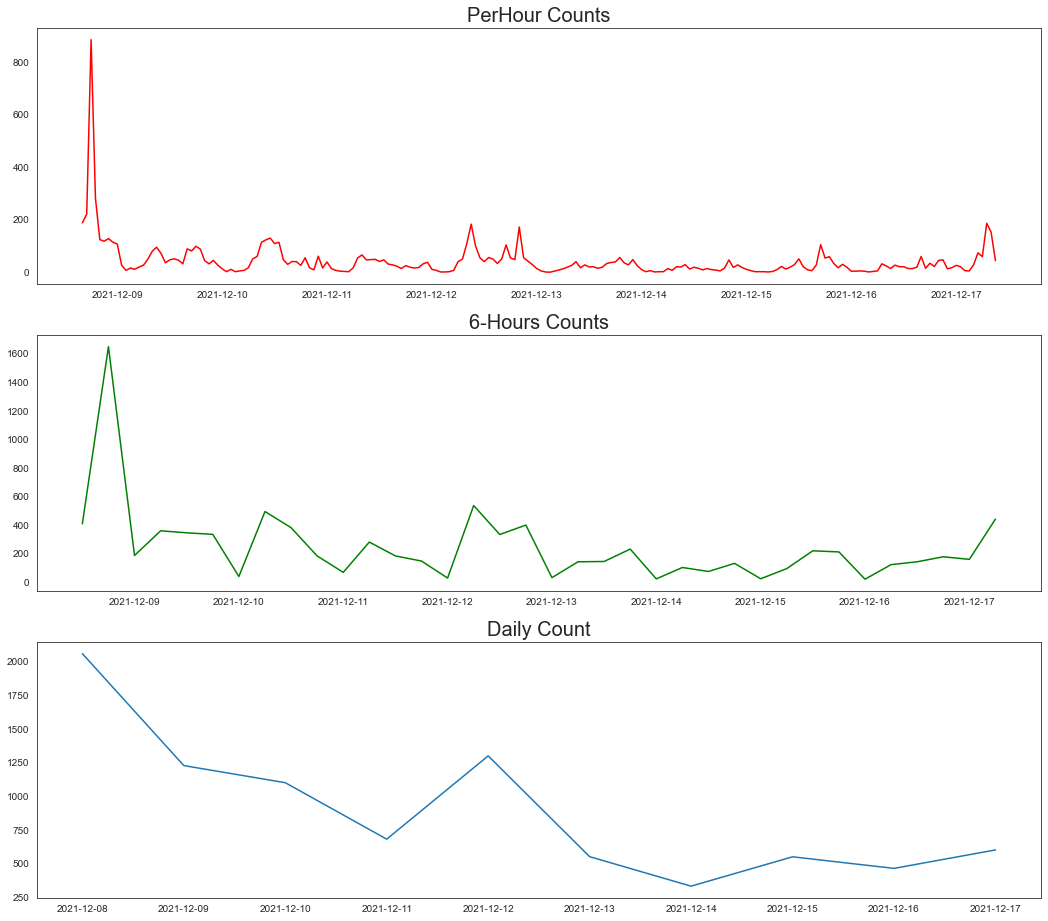

In [199]:
#line plot of the resepective count
sns.set_style('white')
fig, ax = plt.subplots(3, figsize=(18,16))
ax[0].plot(Perhour_count,'-r');
ax[0].set_title('PerHour Counts',fontsize=20);
ax[1].plot(Hourly_count,'-g');
ax[1].set_title('6-Hours Counts',fontsize = 20);
ax[2].plot(daily_count);
ax[2].set_title('Daily Count',fontsize = 20);
plt.show()

**Report**: 
>The above chart display 

In [219]:
#create column 
perh=perh.rename({'user_name':'count'},axis=1)

In [217]:
perh = pd.DataFrame(perh)

In [223]:
per_h=perh.reset_index()

In [230]:
#plot per hour 
fig = go.Figure(go.Scatter(x= per_h['date'],
                          y=per_h['count'],
                          mode ='markers+lines',
                          name ="Submissions",
                          marker_color = 'red'))
fig.update_layout(
    title_text = 'Trend_Tweets PerHour:({} - {})'.format(bj['date'].sort_values()[8872].strftime("%d/%m/%Y %H:%M:%S"),
                                                       bj['date'].sort_values().iloc[-1].strftime("%d/%m/%Y %H:%M:%S")),template="plotly_dark",
    title_x=0.5)
fig.show ()

## Daily Engagement of the tweet By Location 
This display the daily engagement of the user on the tweet(Boris_Johnson Must Go) by Location. in order to capture this graphical representation, the tweet count by location is display and top 5 location with high tweet will be extracted.

In [231]:
#Total Engagement on the tweet By location 
bj.head (5)

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
0,Lorn,2021-12-17 09:17:18,RT @daviesaplegend: Well done North Shropshire...,2021-09-28 06:40:08,0,Plague Island,Twitter Web App,276,False,10,False,4962,2021,2021,0,17,9,17,10,casual_acct
1,PeterKemp,2021-12-17 09:17:10,"RT @MartynCooper: Well, The @LibDems have done...",2019-02-20 11:18:09,0,,Twitter Web App,1576,False,3,False,33941,2021,2019,2,17,9,17,3,normal_acct
2,SasasaG35,2021-12-17 09:17:06,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-02-06 11:35:17,0,"London, England",Twitter for iPhone,1501,False,0,False,42933,2021,2020,1,17,9,17,0,normal_acct
3,RainbowWarriorJOHNSONOUTGTTOFBPE,2021-12-17 09:16:46,RT @hewitson10: It wasn’t a Downing Street loc...,2015-11-24 11:47:35,0,Alcatraz,Twitter for Android,20874,False,2,False,169317,2021,2015,6,17,9,16,2,semi-influential
4,AndySadler,2021-12-17 09:16:40,Today is a great #FollowBackFriday #NorthShrop...,2015-05-04 06:23:11,0,,Twitter for iPhone,79,False,0,False,3751,2021,2015,6,17,9,16,0,casual_acct


In [232]:
#the location data extracted from the orignal data set is used and the 'country'column is used for the count
loc_df.head()

,city,country
0,Plague Island,Plague Island
1,London,England
2,Alcatraz,Alcatraz
3,Gent,België
4,The Far Side of Crazy,The Far Side of Crazy


In [298]:
#location Count dataframe
locatn = loc_df['country'].value_counts()
locatn = pd.DataFrame(locatn)
locatn.reset_index(inplace = True)
locatn.columns = ['country','counts']
#chart
fig = px.bar(locatn[locatn['counts']>10], x="country", y="counts",color="country",text="counts",
             title="Tweet_by Location", template = "ggplot2")
fig.update_traces(textposition='outside')
fig.show()

### **Report**
>Tweet from England cover about 23.13% of the total tweet of '**BorisJohnsonOut**' see (fig ), this was followed by scotland, wales 
and france, also observed from this chat was the top five country with most tweet on the subject matter (England,Scotland,Wales,Northern Ireland,Ireland), this report align with general believe as the top four coutry with most tweet are from in United Kingdom
and the even took place at the United Kingdom.
>> Hence, the study will investigate the daily engagement of the top 5 country with more tweet to visualize country with highest tweet count 
with resepect to time, as this also will denote where the tweet start from at the time which it started.

In [254]:
## Daily Engagment 
print(len(loc_df))
print(len(df))

6122
6122


In [257]:
#extract the following columns : (tot_eng, day_date,hour_date)
fr2 = df.loc[:,['tot_eng','day_date','hur_date']]
fr2.head()

,tot_eng,day_date,hur_date
0,10,17,9
1,0,17,9
2,2,17,9
3,0,17,9
4,0,17,9


In [258]:
loc_df.head()

,city,country
0,Plague Island,Plague Island
1,London,England
2,Alcatraz,Alcatraz
3,Gent,België
4,The Far Side of Crazy,The Far Side of Crazy


In [261]:
#Join the two data Frame (loc_df n fr2)
locatn = pd.concat([fr2,loc_df],axis = 1)
locatn.head(10)

,tot_eng,day_date,hur_date,city,country
0,10,17,9,Plague Island,Plague Island
1,0,17,9,London,England
2,2,17,9,Alcatraz,Alcatraz
3,0,17,9,Gent,België
4,0,17,9,The Far Side of Crazy,The Far Side of Crazy
5,6,17,9,Carmarthenshire,Wales
6,0,17,9,Burnham-on-Crouch,Germany
7,8,17,9,East,England
8,0,17,9,Cheltenham,England
9,1,17,9,Durham,England


In [266]:
top_5 = locatn[locatn['country'].isin(['England','Wales','Scotland','Northern Ireland','Ireland'])]
top_5.reset_index(drop = True, inplace = True)
top_5.head()

,tot_eng,day_date,hur_date,city,country
0,0,17,9,London,England
1,6,17,9,Carmarthenshire,Wales
2,8,17,9,East,England
3,0,17,9,Cheltenham,England
4,1,17,9,Durham,England


In [271]:
#Daily Engagement 
d_eng = top_5.groupby(['day_date','country'],as_index= False).agg({'tot_eng':'sum'})
d_eng.tail()

,day_date,country,tot_eng
45,17,England,1370
46,17,Ireland,60
47,17,Northern Ireland,100
48,17,Scotland,343
49,17,Wales,774


In [285]:
#chart daily engagement by location 

fig = px.scatter(d_eng,
                 x='day_date',
                 y='tot_eng',
                 template = 'plotly_dark',
                 color='country',
                 size_max = 60,
                 size='tot_eng',
                 height = 800,
                 width = 800,
                 title='Daily Engagement By Top_5 LOcation')
fig.show()

### **Report**: 
>The chart report 10 days engagement and top 5 location of the tweet from the 8th day to the 17th day of Decemeber, observed from the chart was the high engagement 
by twitter user in England, and least engagement comes from Ireland twitter usee at the respective days. this align with the tweet count chart by location where England record the highest tweet 
most engage was recorded at the 12th day, this contradict the report of tweet trend with time. 

In [283]:
#Daily Engagement
dec_eng = locatn.groupby('day_date',as_index= False).agg({'tot_eng':'sum'})
#Chart 
fig = px.scatter(dec_eng,
                 x='day_date',
                 y='tot_eng',
                 color_continuous_scale='Rainbow',
                 color='tot_eng',
                 size='tot_eng',
                 width=800, 
                 height=800,
                 title='Most engage days in December')
fig.show()


<Figure size 1080x936 with 0 Axes>

## **Report**: 
> All the tweet extract for the study was with the month of Decemebr, from 8th to 17th see(fig). The 12th day of the month record the 
highest number of engagement with 41,666 total engagment, while the least engagement (2794) date record was 14th day.this report align with the 
of engagement by location but contrary to the tweet count report.

In [304]:
nw = locatn[locatn['counts']>10]

In [314]:
fix = {'England': 'UK','Wales':'UK','Northern Ireland':'UK','Scotland':'UK'}
nw = nw.replace({'country':fix})

In [315]:
nw.head()

,country,counts
0,UK,2053
1,UK,915
2,UK,520
3,UK,105
4,Ireland,69


In [316]:
## Tweet Location BY Map
fig = px.choropleth(nw, locations = nw['country'],
                    color = nw['counts'],locationmode='country names',
                    hover_name = nw['counts'], 
                    color_continuous_scale = px.colors.sequential.Plasma,
                   projection='natural earth',width=800, height=700)
fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
)
fig.update_layout(title='Tweet by Location_Map', geo_scope = 'world')
fig.show()

##### To be Continue ..............................

## ** Task: Trust Sources**

This segment display the most trusted sources,this is carried out under two facors:

- verified / unverfied account 
- Oldest Account  


## Verified / Unverified Account 

From this section the dataset containing the status of each user account, and chart are ploted to display the percentage of verified and unverified account. pie chart plot is used to carried out the task.

In [318]:
#display the data head 
bj.head()

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
0,Lorn,2021-12-17 09:17:18,RT @daviesaplegend: Well done North Shropshire...,2021-09-28 06:40:08,0,Plague Island,Twitter Web App,276,False,10,False,4962,2021,2021,0,17,9,17,10,casual_acct
1,PeterKemp,2021-12-17 09:17:10,"RT @MartynCooper: Well, The @LibDems have done...",2019-02-20 11:18:09,0,,Twitter Web App,1576,False,3,False,33941,2021,2019,2,17,9,17,3,normal_acct
2,SasasaG35,2021-12-17 09:17:06,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-02-06 11:35:17,0,"London, England",Twitter for iPhone,1501,False,0,False,42933,2021,2020,1,17,9,17,0,normal_acct
3,RainbowWarriorJOHNSONOUTGTTOFBPE,2021-12-17 09:16:46,RT @hewitson10: It wasn’t a Downing Street loc...,2015-11-24 11:47:35,0,Alcatraz,Twitter for Android,20874,False,2,False,169317,2021,2015,6,17,9,16,2,semi-influential
4,AndySadler,2021-12-17 09:16:40,Today is a great #FollowBackFriday #NorthShrop...,2015-05-04 06:23:11,0,,Twitter for iPhone,79,False,0,False,3751,2021,2015,6,17,9,16,0,casual_acct


In [320]:
#convert the true or false statement to verified or non verified 
bj['ver_acct'] = bj['ver_acct'].apply(lambda x: 'Verified' if x == True else 'Not-Verified')
bj.head ()

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,retwt_status,user_fav,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat
0,Lorn,2021-12-17 09:17:18,RT @daviesaplegend: Well done North Shropshire...,2021-09-28 06:40:08,0,Plague Island,Twitter Web App,276,Not-Verified,10,False,4962,2021,2021,0,17,9,17,10,casual_acct
1,PeterKemp,2021-12-17 09:17:10,"RT @MartynCooper: Well, The @LibDems have done...",2019-02-20 11:18:09,0,,Twitter Web App,1576,Not-Verified,3,False,33941,2021,2019,2,17,9,17,3,normal_acct
2,SasasaG35,2021-12-17 09:17:06,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-02-06 11:35:17,0,"London, England",Twitter for iPhone,1501,Not-Verified,0,False,42933,2021,2020,1,17,9,17,0,normal_acct
3,RainbowWarriorJOHNSONOUTGTTOFBPE,2021-12-17 09:16:46,RT @hewitson10: It wasn’t a Downing Street loc...,2015-11-24 11:47:35,0,Alcatraz,Twitter for Android,20874,Not-Verified,2,False,169317,2021,2015,6,17,9,16,2,semi-influential
4,AndySadler,2021-12-17 09:16:40,Today is a great #FollowBackFriday #NorthShrop...,2015-05-04 06:23:11,0,,Twitter for iPhone,79,Not-Verified,0,False,3751,2021,2015,6,17,9,16,0,casual_acct


In [324]:
#plot a pie chart of verified and not verified 
Verified = len(bj[bj['ver_acct']=='Verified'])
Not_Verified = len(bj[bj['ver_acct']=='Not-Verified'])
Platform = ['Verified','Not-Verified']
Count = [Verified,Not_Verified]
#====
fig = px.pie(names = Platform,
             values = Count,
             title='Account Status',
            color_discrete_sequence = px.colors.sequential.Rainbow)
fig.update_traces(textposition='inside', textinfo='percent+label')

In [335]:
df['ver_acct'].value_counts()

False    6091
True       31
Name: ver_acct, dtype: int64

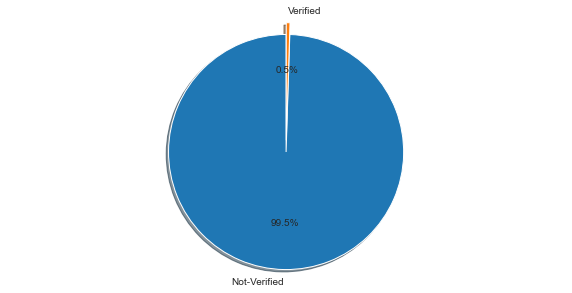

In [336]:
#pie chart
labels = 'Not-Verified', 'Verified'
sizes = [6091, 31]
explode = (0.1, 0)  
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.axis('equal');  

**Report**

Considering how small the fraction of verified account are, the efficieny of the report for trusted sources using acctount status
as a metric is question

In [6]:
#extract verified n not verified accoutn 
ver_bj = df[df['ver_acct']==True].reset_index(drop = True)
unver_bj= df[df['ver_acct']==False].reset_index(drop=True)

In [7]:
#extract source from verify acct 
ver_sour = pd.DataFrame(ver_bj.groupby("sources")["user_name"].count())
ver_sour.reset_index(inplace=True)
ver_sour.columns=["veri_source","count"]

In [8]:
ver_sour = ver_sour.sort_values(by = 'count',ascending = False)

In [9]:
#Bar Chart 
trace1 = go.Bar(
                x = ver_sour['veri_source'],
                y = ver_sour['count'],
                marker = dict(color = 'rgb(250,13,92)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=ver_sour['count'], textposition='outside')
layout = go.Layout(template= "simple_white",title = 'SOURCE DISTRIBUTION OF TWEETS FROM VERIFIED ACCOUNTS' , xaxis = dict(title = 'Verified_Source'), yaxis = dict(title = 'Count'), height=650)
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [11]:
## Oldes Account
df.columns

Index(['user_name', 'date', 'tweet', 'user_date', 'favorite_count',
       'user_locatn', 'sources', 'followers', 'ver_acct', 'retwt_count',
       'retwt_status', 'user_fav', 'today', 'yr_crt', 'acc_yrold', 'day_date',
       'hur_date', 'min_date', 'tot_eng', 'acc_cat'],
      dtype='object')

In [12]:
df['acc_yrold'].value_counts ()

12    1184
10    1064
1      940
0      932
9      773
11     629
2      603
8      575
7      484
6      455
4      383
5      376
3      355
13      90
14      28
15       2
Name: acc_yrold, dtype: int64

In [15]:
#
acct = pd.DataFrame(df.groupby('acc_yrold')['user_name'].count())
acct.reset_index(inplace = True)
acct.columns = ['Acct_Age','count']

In [22]:
#
fig = px.bar(acct, x="Acct_Age", y="count",color="Acct_Age",text="count",
             title="Age Distribution", template = "plotly_white")
fig.update_traces(textposition='outside')
fig.show()

#

Above chart display the age distribution of twitter user account, it was observed that user account with up to 12 years has more count while 15years has the least. hence we select account with at least 10 years and fraction most use sources 

In [26]:
# 
abv_10 = df[df['acc_yrold'].isin([10,11,12,13,14,15])]

In [28]:
abv_10.reset_index(inplace = True, drop = True)

In [30]:
old_sour = pd.DataFrame(abv_10.groupby("sources")["user_name"].count())
old_sour.reset_index(inplace=True)
old_sour.columns=["old_source","count"]

In [33]:
old_sour = old_sour.sort_values(by = 'count',ascending= False)
sour = old_sour.loc[old_sour['count'] >10]

In [38]:
#
fig = px.bar(sour, x="old_source", y="count",color="old_source",text="count",
             title="Source From Old Acct", template = "plotly_white")
fig.update_traces(textposition='outside')
fig.show()

In [40]:
#
sur = pd.DataFrame(df.groupby("sources")["user_name"].count())
sur.reset_index(inplace=True)
sur.columns=["Source","count"]

In [42]:
sur = sur.sort_values(by = 'count',ascending = False)
sur.head(10)

,Source,count
33,Twitter for Android,3352
36,Twitter for iPhone,2981
32,Twitter Web App,1715
35,Twitter for iPad,687
27,TweetDeck,20
14,McBOT,18
29,Tweetbot for iΟS,7
21,Retweetteuse,6
34,Twitter for Mac,5
7,Flamingo for Android,4


In [43]:
#
fig = px.bar(sur[sur['count']>10], x="Source", y="count",color="Source",text="count",
             title="Source_Used", template = "seaborn")
fig.update_traces(textposition='outside')
fig.show()

In [44]:
df.columns 

Index(['user_name', 'date', 'tweet', 'user_date', 'favorite_count',
       'user_locatn', 'sources', 'followers', 'ver_acct', 'retwt_count',
       'retwt_status', 'user_fav', 'today', 'yr_crt', 'acc_yrold', 'day_date',
       'hur_date', 'min_date', 'tot_eng', 'acc_cat'],
      dtype='object')

In [51]:
acct_caty = acct_caty.sort_values(by = 'tot_eng',ascending = False)

In [52]:
#dt
acct_caty = df.groupby('acc_cat',as_index = False).agg({'tot_eng':'sum'})
#chart
fig = px.bar(acct_caty,
             x='acc_cat',
             y='tot_eng',
             color='tot_eng',
             color_continuous_scale='Rainbow',
             template = 'simple_white',
             title='Engagement By Account_Category')
fig.show()

In [71]:
df.isnull().any()

user_name          True
date              False
tweet             False
user_date         False
favorite_count    False
user_locatn        True
sources           False
followers         False
ver_acct          False
retwt_count       False
retwt_status      False
user_fav          False
today             False
yr_crt            False
acc_yrold         False
day_date          False
hur_date          False
min_date          False
tot_eng           False
acc_cat           False
dtype: bool

In [96]:
df2 = df.dropna()
df2.reset_index(drop = True,inplace = True)